combi       0.620826
norm_epi    0.605490
norm_ind    0.577665
Name: vmax, dtype: float64


/tmp/ipykernel_11479/1676082662.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(corr.index.map(nice_labels), rotation=45)


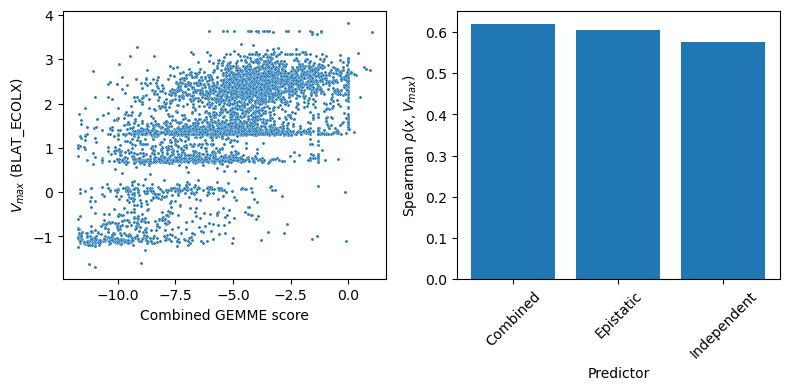

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dms_data = pd.read_csv('./blat_ecolx/BLAT_ECOLX_Ranganathan2015.csv',index_col=0)
dms_data = dms_data[['mutant','km','vmax']]

gemme_predictions = pd.read_csv('./blat_ecolx/results/fitness.csv')
offset = 23
gemme_predictions['pos'] = gemme_predictions.pos + offset
gemme_predictions['mutant'] = gemme_predictions.wt + gemme_predictions.pos.astype(str) + gemme_predictions.mut
gemme_predictions = gemme_predictions[['mutant','combi','norm_epi','norm_ind']]
dms_data_w_gemme = dms_data.merge(gemme_predictions)

fig, ax = plt.subplots(1,2, figsize=(8, 4))
sns.scatterplot(
    data = dms_data_w_gemme, 
    x = 'combi', y = 'vmax',
    ax = ax[0], s=5
)
ax[0].set_xlabel('Combined GEMME score')
ax[0].set_ylabel(r'$V_{max}$ (BLAT_ECOLX)')
corr = dms_data_w_gemme[['vmax','combi','norm_epi','norm_ind']].corr(method='spearman')['vmax'].iloc[1:]
print(corr)
ax[1].bar(x = corr.index, height= np.abs(corr.values))
nice_labels = {
    'combi':'Combined',
    'norm_epi':'Epistatic',
    'norm_ind':'Independent',
}

ax[1].set_xticklabels(corr.index.map(nice_labels), rotation=45)
ax[1].set_xlabel('Predictor')
ax[1].set_ylabel(r'Spearman $\rho (x, V_{max})$')
plt.tight_layout()